## Import required packages 

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from matplotlib.pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

## Import data from AWS and prepare for processing

In [3]:
df = pd.read_csv('https://mod4finalproject.s3.amazonaws.com/zillow_cleaned_no_nulls.csv',
                   index_col=0,
                   dtype = {'zip':'object'})

In [6]:
df.index = pd.to_datetime(df.index)

In [50]:
df.columns

Index(['regionid', 'zip', 'city', 'state', 'metro', 'countyname', 'sizerank',
       'value'],
      dtype='object')

In [51]:
df = df.drop(columns = ['regionid', 'city', 'state', 'metro', 'countyname', 'sizerank'])

In [52]:
d2011 = '2011-05-01'
d2018 = '2018-04-01'

In [53]:
df = df[d2011:d2018]

## Define top 5 zip codes

In [34]:
top_zips = ['33976', '33974', '47353', '71263', '67860']

In [35]:
df = df.loc[df.zip.isin(top_zips)]

## Define functions for use in analysis

In [76]:
def plot_zip(df,zipcode, start, end):
    zip_df = df.loc[df['zip']==zipcode]
    zip_df = zip_df.loc[(zip_df.index >= start) & (zip_df.index <= end)]
    sns.set(rc={'figure.figsize':(15,5)}, style='darkgrid')
    sns.lineplot(x=zip_df.index, y=zip_df.value)
    return plt.show()

In [77]:
def plot_diff(df, zipcode, start, end, lag):
    zip_df = df.loc[df['zip'] == zipcode]
    zip_df = zip_df.loc[(zip_df.index >= start) & (zip_df.index <= end)] 
    zip_df['diff'] = zip_df.value - zip_df.value.shift(lag)
    sns.set(rc={'figure.figsize':(15,5)}, style='darkgrid')
    plot = sns.lineplot(x=zip_df.index, y=zip_df['diff'])
    return plt.show()

In [78]:
def get_zip_df(df, zipcode, start, end):
    zip_df = df.loc[df['zip']==zipcode]
    zip_df = zip_df.loc[(zip_df.index >= start) & (zip_df.index <= end)]
    return zip_df

In [145]:
def get_diff_df(df, zipcode, start, end, lag):
    diff_df = df.loc[df['zip'] == zipcode]
    diff_df = diff_df.loc[(diff_df.index >= start) & (diff_df.index <= end)] 
    diff_df['diff'] = diff_df.value - diff_df.value.shift(lag)
    diff_df = diff_df.dropna(axis=0)
    return diff_df

In [80]:
## Test functions
# diff_df(df, top_zips[0], d2011, d2018, 2)

In [81]:
## Test functions
# for z in top_zips:
#     diff_plot(df, z, d2011, d2018, 1)

## Analysis for Lehigh Acres, FL 33976

In [95]:
zipcode = '33976'
start = d2011
end = d2018
lag = 1

lehigh = get_zip_df(df, zipcode, start, end)

### Plot of values, monthly

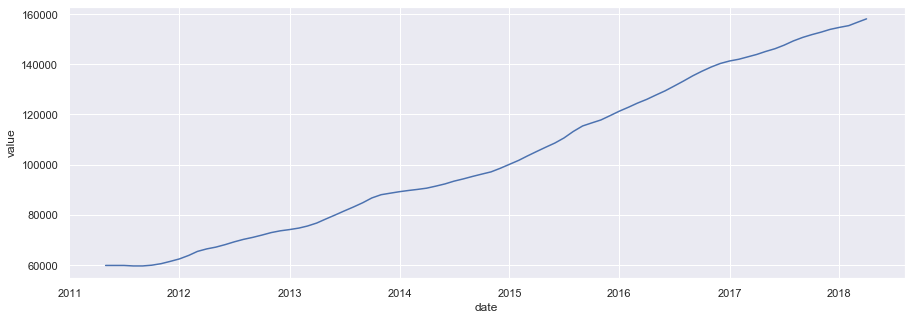

In [83]:
plot_zip(df, zipcode, start, end)

### Decomposition

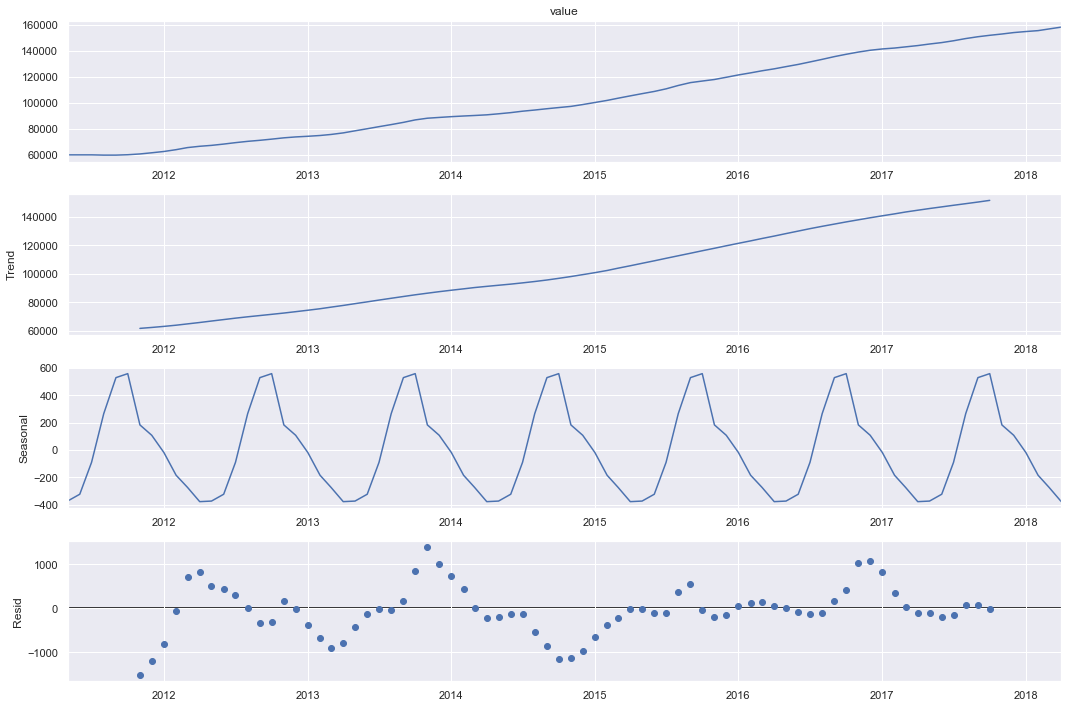

In [97]:
rcParams['figure.figsize'] = (15, 10)
result = seasonal_decompose(lehigh.value, model='additive')
result.plot()
plt.show()

### Plot of difference from lag

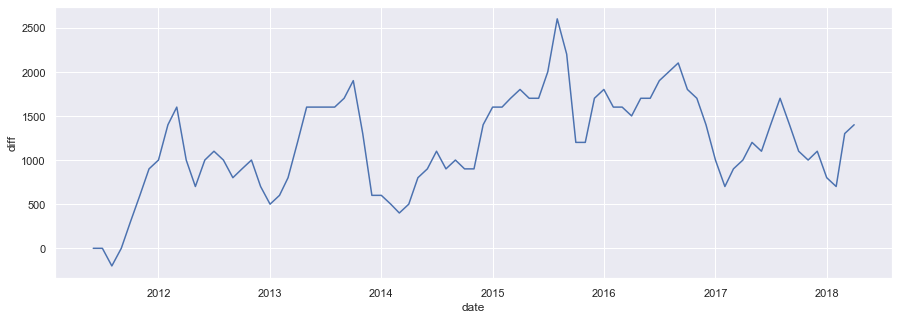

In [84]:
plot_diff(df, zipcode, start, end, lag)

### ACF and PACF for lag values

In [146]:
diff_df = get_diff_df(df, zipcode, start, end, lag)

### ACF (Pandas)

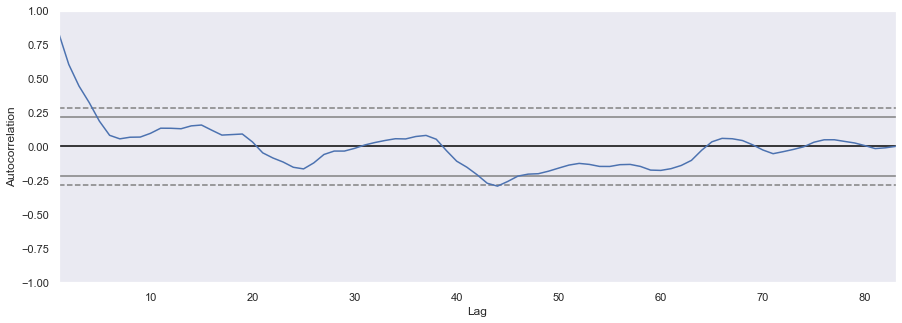

In [158]:
plt.figure(figsize=(15,5))
pd.plotting.autocorrelation_plot(diff_df['diff']);

### ACF (statsmodel)

In [165]:
diff_df['diff']

date
2011-06-01       0.0
2011-07-01       0.0
2011-08-01    -200.0
2011-09-01       0.0
2011-10-01     300.0
               ...  
2017-12-01    1100.0
2018-01-01     800.0
2018-02-01     700.0
2018-03-01    1300.0
2018-04-01    1400.0
Name: diff, Length: 83, dtype: float64

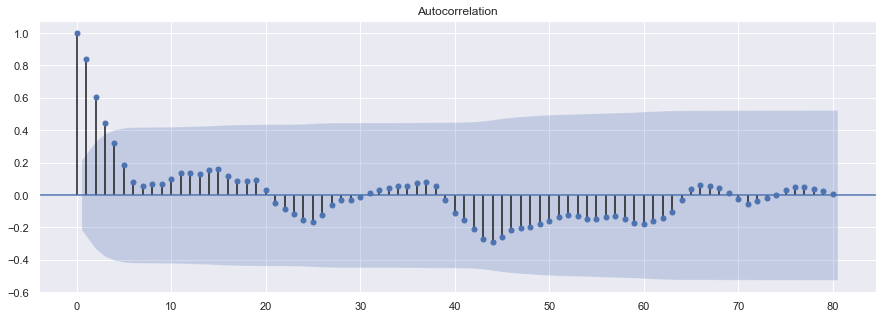

In [176]:
rcParams['figure.figsize'] = 15, 5
plot_acf(diff_df['diff'], lags=80);

### PACF (statsmodel)

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


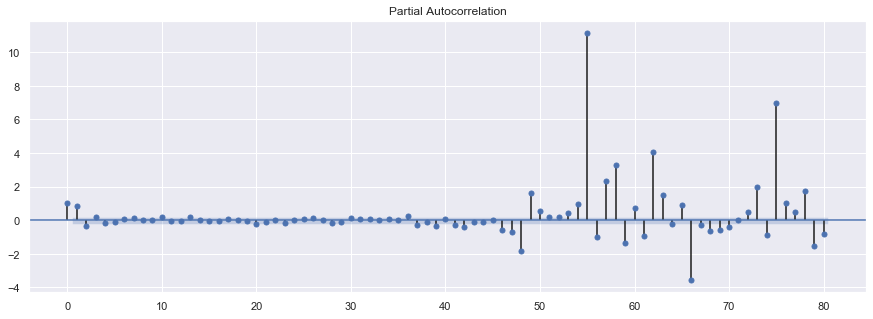

In [177]:
rcParams['figure.figsize'] = 15, 5
plot_pacf(diff_df['diff'], lags=80);